In [1]:
import pandas as pd
import json
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
decisoes = {
    'Indeferida': 0,
    'Deferida': 1,
    'Cancelada': 2,
    'Arquivamento': 3
}

In [3]:
df = pd.read_csv('processos_de_licenciamento_ambiental.csv')

In [4]:
df = df.drop(['Ano', 'Mes'], axis='columns')

df

,Regional,Municipio,Empreendimento,Modalidade,Classe,Atividade,Data de Publicacao,Decisao
0,SUPRAM Sul de Minas,Itutinga,3W TRANSPORTES EIRELI,LAS Cadastro,1,F-02-01-1-Transporte rodoviário de produtos e ...,03/06/2019,Deferida
1,SUPRAM Sul de Minas,Luminárias,HERNANE JOSÉ FERREIRA ME,LAS Cadastro,2,"B-01-09-0-Aparelhamento, beneficiamento, prepa...",04/06/2019,Deferida
2,SUPRAM Sul de Minas,Bom Repouso,LATICÍNIOS JOANA LTDA.,LAS Cadastro,2,D-01-06-1-Fabricação de produtos de laticínios...,04/06/2019,Deferida
3,SUPRAM Sul de Minas,Pouso Alegre,UNILEVER BRASIL INDUSTRIAL LTDA.,LAS Cadastro,2,"F-06-01-7-Postos revendedores, postos ou ponto...",04/06/2019,Deferida
4,SUPRAM Sul de Minas,Itamonte,CLÁUDIO PENEDO SCARPA E OUTROS - GRANJA SANTA ...,LAS Cadastro,2,G-02-02-1-Avicultura,04/06/2019,Deferida
5,SUPRAM Sul de Minas,Nepomuceno,CERÂMICA OLIVEIRA & OLIVEIRA LTDA.,LAS Cadastro,1,B-01-03-1-Fabricação de cerâmica vermelha (tel...,04/06/2019,Deferida
6,SUPRAM Alto São Francisco,Capitólio,CAPITOLIO ALIMENTOS LTDA,LAS Cadastro,2,G-04-01-4-Beneficiamento primário de produtos ...,05/06/2019,Deferida
7,SUPRAM Alto São Francisco,Cláudio,METALURGICA AMAPA LTDA FILIAL,LAS Cadastro,2,B-05-04-5-Fabricação de estruturas metálicas e...,05/06/2019,Deferida
8,SUPRAM Alto São Francisco,Formiga,ARLAFOR INDUSTRIA E COMERCIO DE ARLA LTDA,LAS Cadastro,2,C-04-01-4-Produção de substâncias químicas e d...,05/06/2019,Deferida
9,SUPRAM Alto São Francisco,Morada Nova de Minas,APARECIDA GISLEY DA SILVA ARAUJO ME,LAS Cadastro,2,D-01-05-8-Processamento de subprodutos de orig...,05/06/2019,Deferida


## Colunas

<ul>
    <li>Regional: Indica a Superintendência Regional de Meio Ambiente na qual foi solicitado o licenciamento ambiental</li>
    <li>Modalidade: Modalidade de licenciamento</li>
    <li>Classe: porte e potencial poluidor/degradador</li>
    <li>Atividade: Atividade-fim do empreendimento</li>
</ul>

In [5]:
df['Decisao'].value_counts()

Deferida        460
Indeferida      108
Arquivamento     51
Cancelada         1
Name: Decisao, dtype: int64

In [6]:
df.head()

,Regional,Municipio,Empreendimento,Modalidade,Classe,Atividade,Data de Publicacao,Decisao
0,SUPRAM Sul de Minas,Itutinga,3W TRANSPORTES EIRELI,LAS Cadastro,1,F-02-01-1-Transporte rodoviário de produtos e ...,03/06/2019,Deferida
1,SUPRAM Sul de Minas,Luminárias,HERNANE JOSÉ FERREIRA ME,LAS Cadastro,2,"B-01-09-0-Aparelhamento, beneficiamento, prepa...",04/06/2019,Deferida
2,SUPRAM Sul de Minas,Bom Repouso,LATICÍNIOS JOANA LTDA.,LAS Cadastro,2,D-01-06-1-Fabricação de produtos de laticínios...,04/06/2019,Deferida
3,SUPRAM Sul de Minas,Pouso Alegre,UNILEVER BRASIL INDUSTRIAL LTDA.,LAS Cadastro,2,"F-06-01-7-Postos revendedores, postos ou ponto...",04/06/2019,Deferida
4,SUPRAM Sul de Minas,Itamonte,CLÁUDIO PENEDO SCARPA E OUTROS - GRANJA SANTA ...,LAS Cadastro,2,G-02-02-1-Avicultura,04/06/2019,Deferida


In [7]:
df_numerico = df.copy()
df_numerico['Decisao'] = df_numerico['Decisao'].apply(lambda x: decisoes[x])

In [8]:
df_numerico

,Regional,Municipio,Empreendimento,Modalidade,Classe,Atividade,Data de Publicacao,Decisao
0,SUPRAM Sul de Minas,Itutinga,3W TRANSPORTES EIRELI,LAS Cadastro,1,F-02-01-1-Transporte rodoviário de produtos e ...,03/06/2019,1
1,SUPRAM Sul de Minas,Luminárias,HERNANE JOSÉ FERREIRA ME,LAS Cadastro,2,"B-01-09-0-Aparelhamento, beneficiamento, prepa...",04/06/2019,1
2,SUPRAM Sul de Minas,Bom Repouso,LATICÍNIOS JOANA LTDA.,LAS Cadastro,2,D-01-06-1-Fabricação de produtos de laticínios...,04/06/2019,1
3,SUPRAM Sul de Minas,Pouso Alegre,UNILEVER BRASIL INDUSTRIAL LTDA.,LAS Cadastro,2,"F-06-01-7-Postos revendedores, postos ou ponto...",04/06/2019,1
4,SUPRAM Sul de Minas,Itamonte,CLÁUDIO PENEDO SCARPA E OUTROS - GRANJA SANTA ...,LAS Cadastro,2,G-02-02-1-Avicultura,04/06/2019,1
5,SUPRAM Sul de Minas,Nepomuceno,CERÂMICA OLIVEIRA & OLIVEIRA LTDA.,LAS Cadastro,1,B-01-03-1-Fabricação de cerâmica vermelha (tel...,04/06/2019,1
6,SUPRAM Alto São Francisco,Capitólio,CAPITOLIO ALIMENTOS LTDA,LAS Cadastro,2,G-04-01-4-Beneficiamento primário de produtos ...,05/06/2019,1
7,SUPRAM Alto São Francisco,Cláudio,METALURGICA AMAPA LTDA FILIAL,LAS Cadastro,2,B-05-04-5-Fabricação de estruturas metálicas e...,05/06/2019,1
8,SUPRAM Alto São Francisco,Formiga,ARLAFOR INDUSTRIA E COMERCIO DE ARLA LTDA,LAS Cadastro,2,C-04-01-4-Produção de substâncias químicas e d...,05/06/2019,1
9,SUPRAM Alto São Francisco,Morada Nova de Minas,APARECIDA GISLEY DA SILVA ARAUJO ME,LAS Cadastro,2,D-01-05-8-Processamento de subprodutos de orig...,05/06/2019,1


In [9]:
df_numerico['Modalidade'] = preprocessing.LabelEncoder().fit_transform(y=df_numerico['Modalidade'])

In [10]:
df_numerico

,Regional,Municipio,Empreendimento,Modalidade,Classe,Atividade,Data de Publicacao,Decisao
0,SUPRAM Sul de Minas,Itutinga,3W TRANSPORTES EIRELI,5,1,F-02-01-1-Transporte rodoviário de produtos e ...,03/06/2019,1
1,SUPRAM Sul de Minas,Luminárias,HERNANE JOSÉ FERREIRA ME,5,2,"B-01-09-0-Aparelhamento, beneficiamento, prepa...",04/06/2019,1
2,SUPRAM Sul de Minas,Bom Repouso,LATICÍNIOS JOANA LTDA.,5,2,D-01-06-1-Fabricação de produtos de laticínios...,04/06/2019,1
3,SUPRAM Sul de Minas,Pouso Alegre,UNILEVER BRASIL INDUSTRIAL LTDA.,5,2,"F-06-01-7-Postos revendedores, postos ou ponto...",04/06/2019,1
4,SUPRAM Sul de Minas,Itamonte,CLÁUDIO PENEDO SCARPA E OUTROS - GRANJA SANTA ...,5,2,G-02-02-1-Avicultura,04/06/2019,1
5,SUPRAM Sul de Minas,Nepomuceno,CERÂMICA OLIVEIRA & OLIVEIRA LTDA.,5,1,B-01-03-1-Fabricação de cerâmica vermelha (tel...,04/06/2019,1
6,SUPRAM Alto São Francisco,Capitólio,CAPITOLIO ALIMENTOS LTDA,5,2,G-04-01-4-Beneficiamento primário de produtos ...,05/06/2019,1
7,SUPRAM Alto São Francisco,Cláudio,METALURGICA AMAPA LTDA FILIAL,5,2,B-05-04-5-Fabricação de estruturas metálicas e...,05/06/2019,1
8,SUPRAM Alto São Francisco,Formiga,ARLAFOR INDUSTRIA E COMERCIO DE ARLA LTDA,5,2,C-04-01-4-Produção de substâncias químicas e d...,05/06/2019,1
9,SUPRAM Alto São Francisco,Morada Nova de Minas,APARECIDA GISLEY DA SILVA ARAUJO ME,5,2,D-01-05-8-Processamento de subprodutos de orig...,05/06/2019,1


In [11]:
df_numerico['Atividade'] = preprocessing.LabelEncoder().fit_transform(y=df_numerico['Atividade'])
df_numerico['Municipio'] = preprocessing.LabelEncoder().fit_transform(y=df_numerico['Municipio'])
df_numerico['Regional'] = preprocessing.LabelEncoder().fit_transform(y=df_numerico['Regional'])

df_numerico.head()

,Regional,Municipio,Empreendimento,Modalidade,Classe,Atividade,Data de Publicacao,Decisao
0,6,128,3W TRANSPORTES EIRELI,5,1,101,03/06/2019,1
1,6,151,HERNANE JOSÉ FERREIRA ME,5,2,32,04/06/2019,1
2,6,22,LATICÍNIOS JOANA LTDA.,5,2,72,04/06/2019,1
3,6,206,UNILEVER BRASIL INDUSTRIAL LTDA.,5,2,111,04/06/2019,1
4,6,118,CLÁUDIO PENEDO SCARPA E OUTROS - GRANJA SANTA ...,5,2,118,04/06/2019,1


In [12]:
df_numerico.corr()

,Regional,Municipio,Modalidade,Classe,Atividade,Decisao
Regional,1.000000,0.069840,-0.142744,-0.048456,0.166915,-0.242584
Municipio,0.069840,1.000000,0.064515,0.059095,-0.012587,0.097721
Modalidade,-0.142744,0.064515,1.000000,0.527911,-0.127917,0.307942
Classe,-0.048456,0.059095,0.527911,1.000000,-0.161029,0.215907
Atividade,0.166915,-0.012587,-0.127917,-0.161029,1.000000,-0.001780
Decisao,-0.242584,0.097721,0.307942,0.215907,-0.001780,1.000000


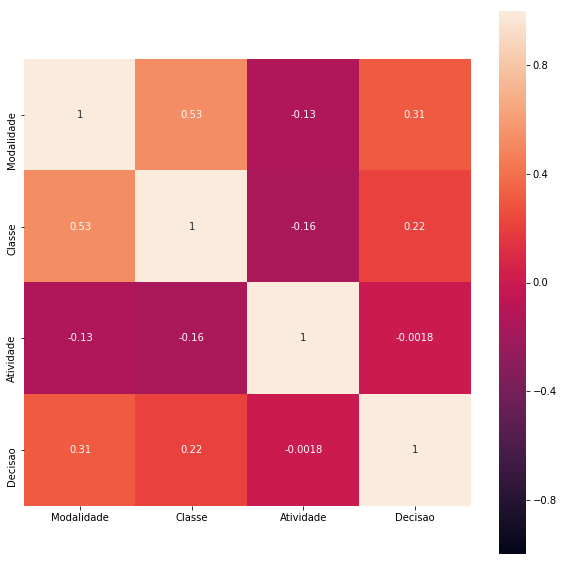

In [13]:
corr_mat = df_numerico[['Modalidade', 'Classe', 'Atividade', 'Decisao']].corr()



f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr_mat, 
    annot=True, 
    square=True, 
    vmax=1, 
    vmin=-1
)

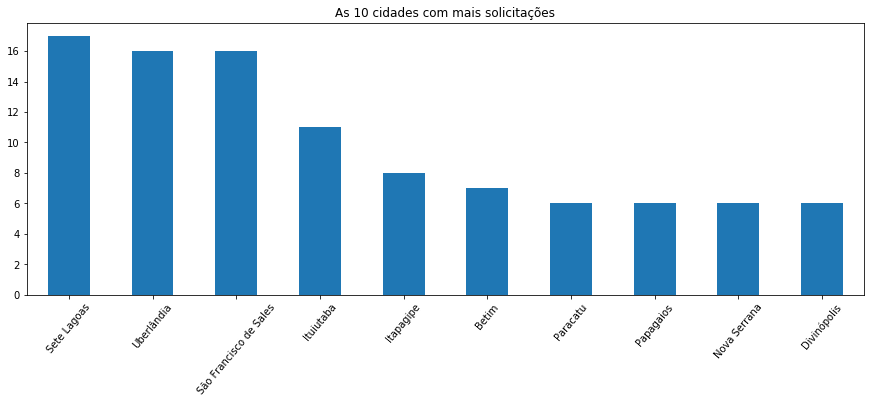

In [14]:
df['Municipio'].value_counts()[:10].plot(kind='bar', title='As 10 cidades com mais solicitações', figsize=(15,5), rot=50)

In [15]:
df['Empreendimento'].unique

<bound method Series.unique of 0                                 3W TRANSPORTES EIRELI 
1                               HERNANE JOSÉ FERREIRA ME
2                                 LATICÍNIOS JOANA LTDA.
3                       UNILEVER BRASIL INDUSTRIAL LTDA.
4      CLÁUDIO PENEDO SCARPA E OUTROS - GRANJA SANTA ...
5                     CERÂMICA OLIVEIRA & OLIVEIRA LTDA.
6                               CAPITOLIO ALIMENTOS LTDA
7                          METALURGICA AMAPA LTDA FILIAL
8              ARLAFOR INDUSTRIA E COMERCIO DE ARLA LTDA
9                    APARECIDA GISLEY DA SILVA ARAUJO ME
10                            MIRANDA E ASSUNÇÃO LTDA ME
11     MARIO DE CARVALHO BERNARDES NETO / FAZENDA BOR...
12     GAR MINERAÇÃO COMÉRCIO, IMPORTAÇÃO E EXPORTAÇÃ...
13     JAMES FRANÇA ACOSTA E JOÃO BATISTA DE PAULA/FA...
14        CÉU DE MINAS NUTRIÇÃO ANIMAL LTDA./MAT. 50.798
15        FAZENDA RIACHO DOCE E ÁGUA VIVA E SERRA VERDE 
16       HI-TECH FERTILIZANTES E NUTRIÇÃO VEGETAL LTDA. 


In [16]:
df.head()

,Regional,Municipio,Empreendimento,Modalidade,Classe,Atividade,Data de Publicacao,Decisao
0,SUPRAM Sul de Minas,Itutinga,3W TRANSPORTES EIRELI,LAS Cadastro,1,F-02-01-1-Transporte rodoviário de produtos e ...,03/06/2019,Deferida
1,SUPRAM Sul de Minas,Luminárias,HERNANE JOSÉ FERREIRA ME,LAS Cadastro,2,"B-01-09-0-Aparelhamento, beneficiamento, prepa...",04/06/2019,Deferida
2,SUPRAM Sul de Minas,Bom Repouso,LATICÍNIOS JOANA LTDA.,LAS Cadastro,2,D-01-06-1-Fabricação de produtos de laticínios...,04/06/2019,Deferida
3,SUPRAM Sul de Minas,Pouso Alegre,UNILEVER BRASIL INDUSTRIAL LTDA.,LAS Cadastro,2,"F-06-01-7-Postos revendedores, postos ou ponto...",04/06/2019,Deferida
4,SUPRAM Sul de Minas,Itamonte,CLÁUDIO PENEDO SCARPA E OUTROS - GRANJA SANTA ...,LAS Cadastro,2,G-02-02-1-Avicultura,04/06/2019,Deferida


In [17]:
df['Atividade'].unique().size

130

In [18]:
def formatar_atividade(atividade):
    at_quebrada = atividade.split('-')
    
    cod = ''
    
    
    cod = at_quebrada[0]
    for i in range(1, 4):
        cod += '-' + at_quebrada[i]
        
    print(cod)

    return cod

In [19]:
df['Codigo-Atividade'] = df['Atividade'].apply(lambda x : formatar_atividade(x))

F-02-01-1
B-01-09-0
D-01-06-1
F-06-01-7
G-02-02-1
B-01-03-1
G-04-01-4
B-05-04-5
C-04-01-4
D-01-05-8
A-03-01-8
G-02-07-0
A-02-10-0
G-02-04-6
D-01-05-8
G-05-02-0
C-04-19-7
C-06-01-7
B-01-09-0
G-01-01-5
A-03-01-8
B-03-07-7
C-09-03-2
E-03-07-9
A-01-01-5
G-02-02-1
G-01-01-5
G-02-02-1
A-02-09-7
A-02-07-0
A-05-04-5
A-03-01-8
E-02-01-1
G-01-05-8
B-01-09-0
B-01-02-3
B-01-02-3
C-07-01-3
F-02-01-1
F-02-01-1
F-05-05-3
A-03-01-8
F-05-07-1
F-02-01-1
F-06-04-6
A-03-02-6
G-02-02-1
F-02-01-1
F-06-01-7
B-01-09-0
F-05-07-1
F-06-01-7
F-06-01-7
F-06-01-7
D-01-14-7
F-02-01-1
F-02-01-1
A-03-01-8
A-03-01-8
D-01-06-1
F-02-01-1
G-03-03-4
F-06-01-7
A-03-02-6
F-06-01-7
F-06-01-7
A-03-01-8
F-06-01-7
C-09-03-2
B-01-01-5
F-06-01-7
C-10-01-4
F-06-01-7
D-01-13-9
A-03-02-6
G-02-07-0
D-01-07-4
E-04-01-4
A-03-02-6
E-04-01-4
F-05-16-0
A-03-01-8
G-01-03-1
D-01-13-9
G-01-01-5
G-02-07-0
G-01-03-1
G-01-03-1
F-06-01-7
G-02-07-0
G-01-03-1
A-03-01-8
D-01-14-7
G-01-03-1
G-02-07-0
G-02-07-0
C-09-03-2
A-03-01-8
A-03-01-8
A-02-07-0


In [20]:
df['Codigo-Atividade'] = df['Codigo-Atividade'].apply(lambda x: x.replace('\n', '')) 

In [21]:
df

,Regional,Municipio,Empreendimento,Modalidade,Classe,Atividade,Data de Publicacao,Decisao,Codigo-Atividade
0,SUPRAM Sul de Minas,Itutinga,3W TRANSPORTES EIRELI,LAS Cadastro,1,F-02-01-1-Transporte rodoviário de produtos e ...,03/06/2019,Deferida,F-02-01-1
1,SUPRAM Sul de Minas,Luminárias,HERNANE JOSÉ FERREIRA ME,LAS Cadastro,2,"B-01-09-0-Aparelhamento, beneficiamento, prepa...",04/06/2019,Deferida,B-01-09-0
2,SUPRAM Sul de Minas,Bom Repouso,LATICÍNIOS JOANA LTDA.,LAS Cadastro,2,D-01-06-1-Fabricação de produtos de laticínios...,04/06/2019,Deferida,D-01-06-1
3,SUPRAM Sul de Minas,Pouso Alegre,UNILEVER BRASIL INDUSTRIAL LTDA.,LAS Cadastro,2,"F-06-01-7-Postos revendedores, postos ou ponto...",04/06/2019,Deferida,F-06-01-7
4,SUPRAM Sul de Minas,Itamonte,CLÁUDIO PENEDO SCARPA E OUTROS - GRANJA SANTA ...,LAS Cadastro,2,G-02-02-1-Avicultura,04/06/2019,Deferida,G-02-02-1
5,SUPRAM Sul de Minas,Nepomuceno,CERÂMICA OLIVEIRA & OLIVEIRA LTDA.,LAS Cadastro,1,B-01-03-1-Fabricação de cerâmica vermelha (tel...,04/06/2019,Deferida,B-01-03-1
6,SUPRAM Alto São Francisco,Capitólio,CAPITOLIO ALIMENTOS LTDA,LAS Cadastro,2,G-04-01-4-Beneficiamento primário de produtos ...,05/06/2019,Deferida,G-04-01-4
7,SUPRAM Alto São Francisco,Cláudio,METALURGICA AMAPA LTDA FILIAL,LAS Cadastro,2,B-05-04-5-Fabricação de estruturas metálicas e...,05/06/2019,Deferida,B-05-04-5
8,SUPRAM Alto São Francisco,Formiga,ARLAFOR INDUSTRIA E COMERCIO DE ARLA LTDA,LAS Cadastro,2,C-04-01-4-Produção de substâncias químicas e d...,05/06/2019,Deferida,C-04-01-4
9,SUPRAM Alto São Francisco,Morada Nova de Minas,APARECIDA GISLEY DA SILVA ARAUJO ME,LAS Cadastro,2,D-01-05-8-Processamento de subprodutos de orig...,05/06/2019,Deferida,D-01-05-8


Text(0, 0.5, 'Atividade-fim')

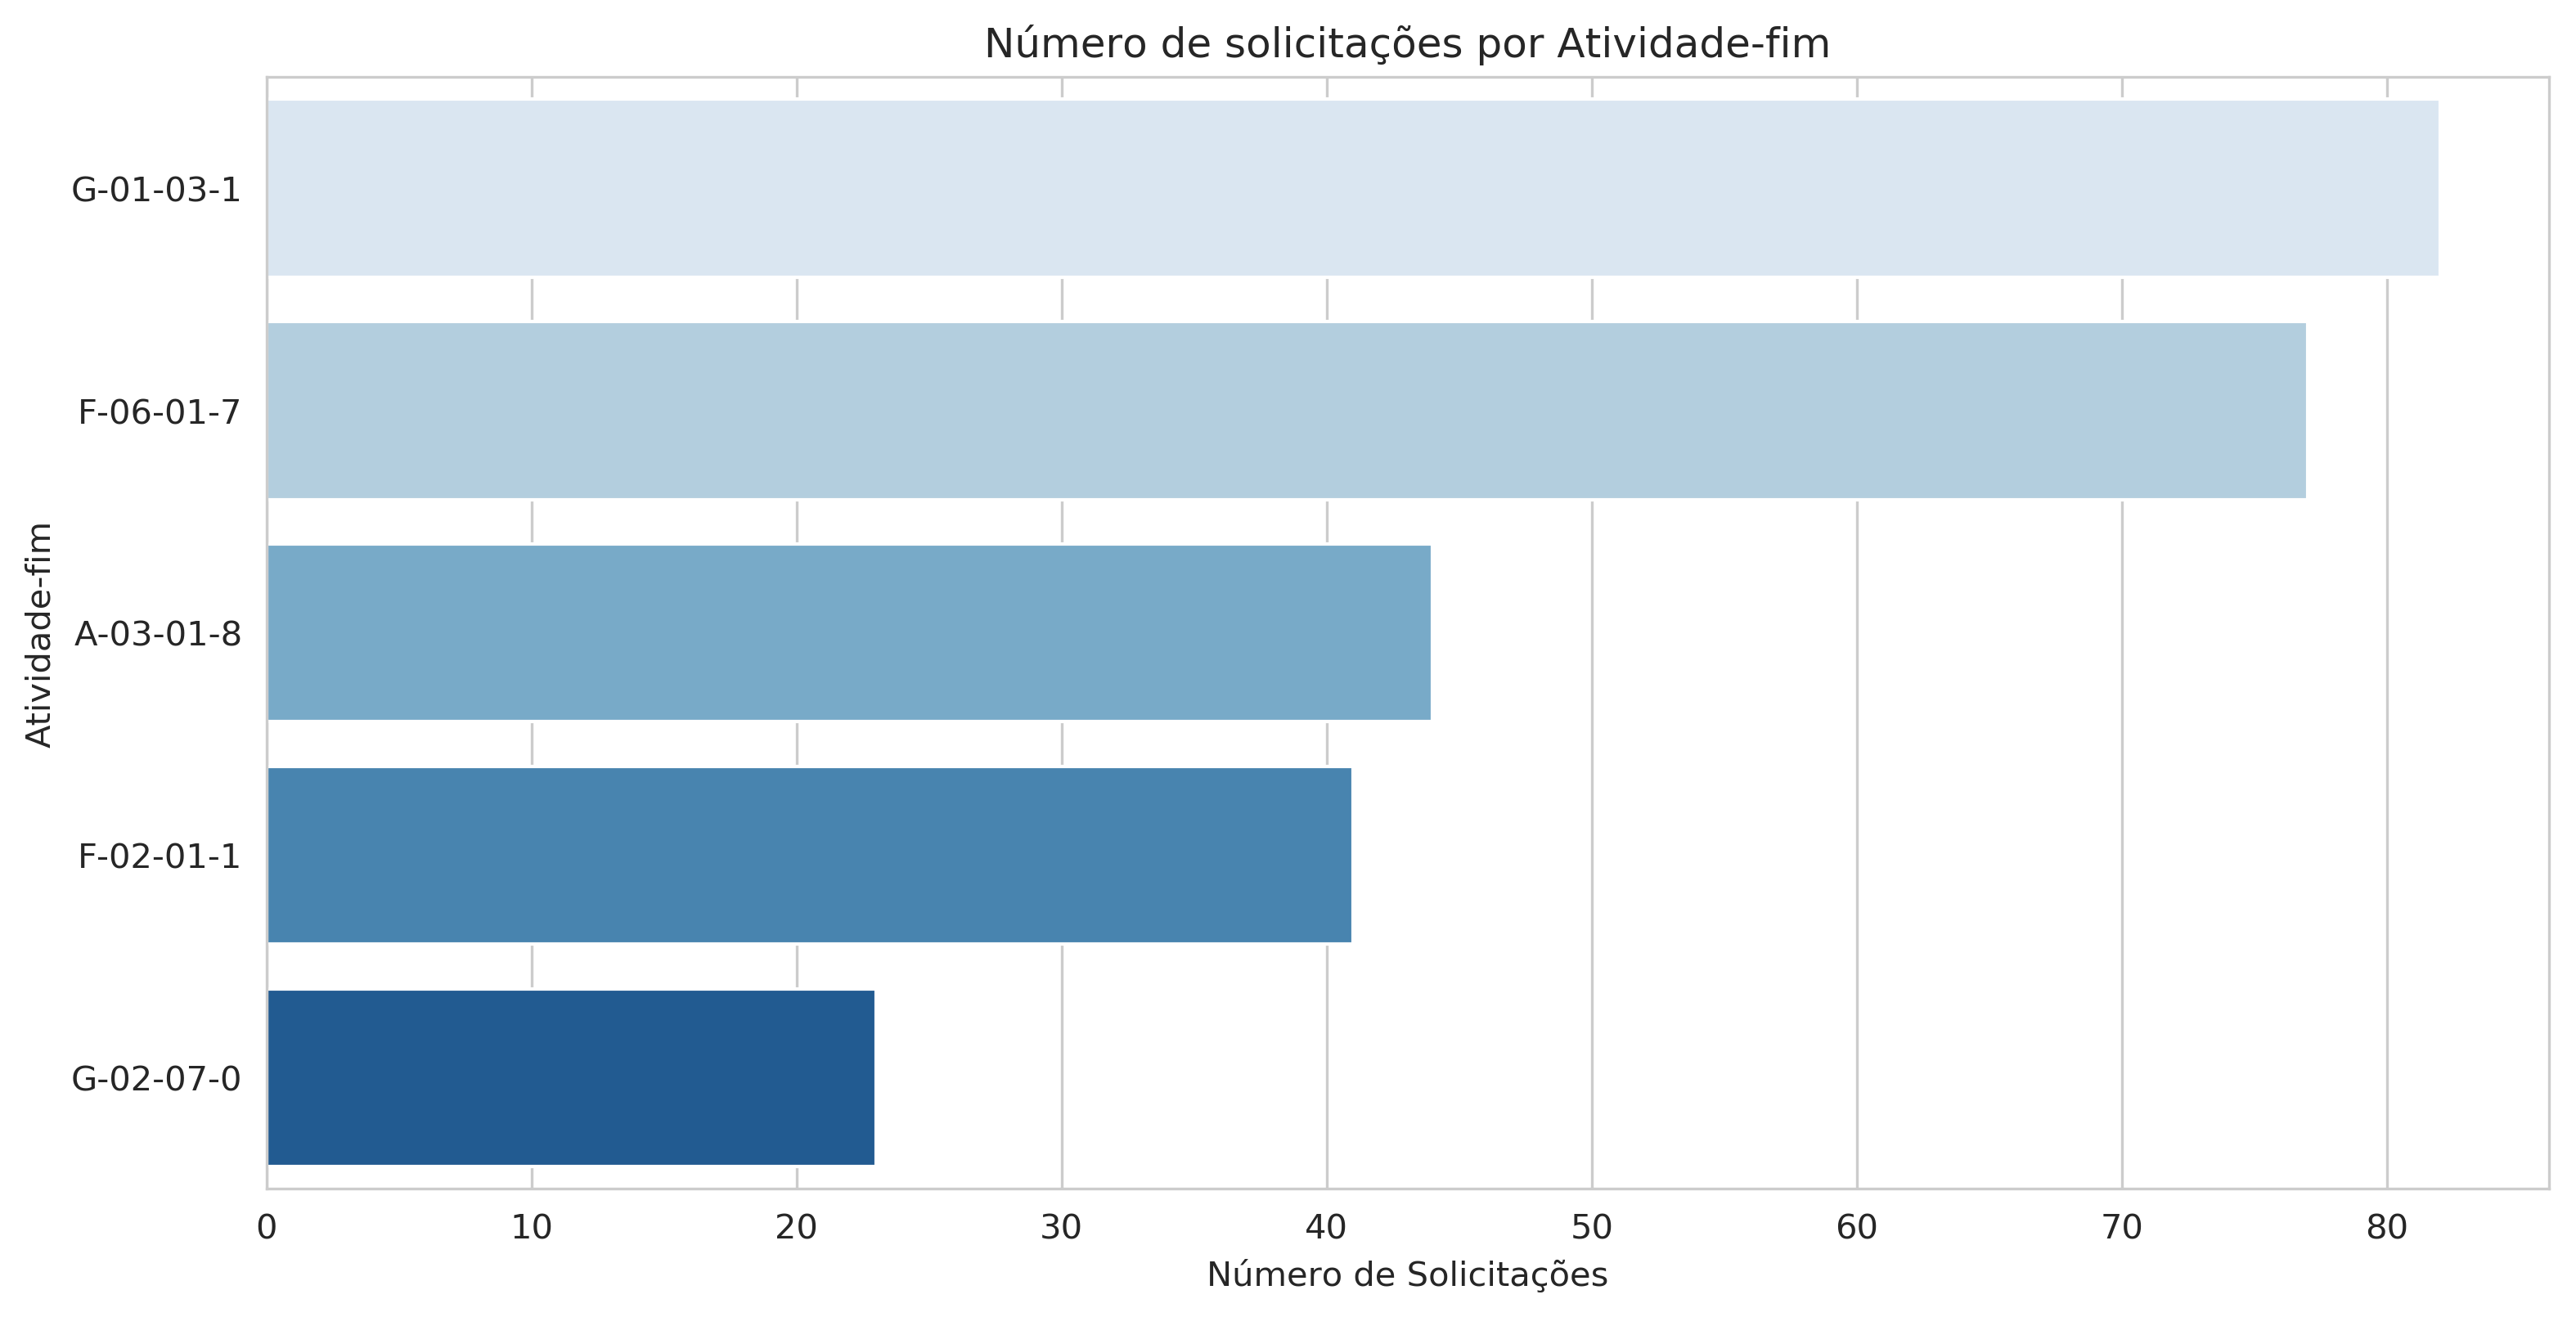

In [22]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 6), dpi=300)
ax = sns.countplot(
    y="Codigo-Atividade", 
    data=df,  
    order=df['Codigo-Atividade'].value_counts().iloc[:5].index, 
    palette='Blues'
)

ax.set_title('Número de solicitações por Atividade-fim')
ax.set_xlabel('Número de Solicitações')
ax.set_ylabel('Atividade-fim')

Text(0.5, 1.0, 'Relação entre a Modalidade de Licenciamento e a Decisão de acordo com a Atividade-fim do Empreendimento')

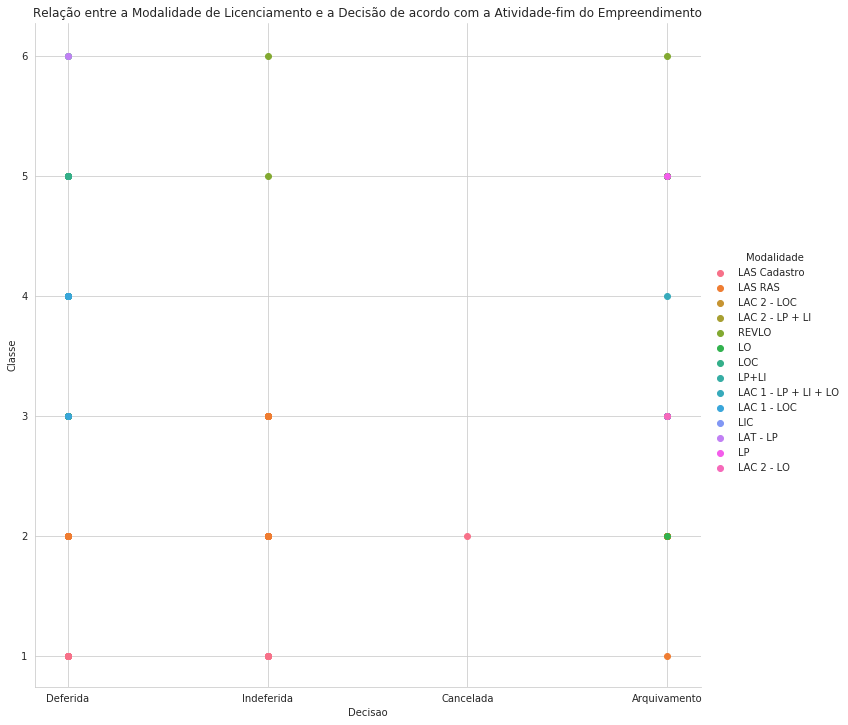

In [25]:
sns.FacetGrid(
    df,
    hue='Modalidade',
    height=10
).map(
    plt.scatter, 'Decisao', 'Classe'
).add_legend()


plt.title('Relação entre a Modalidade de Licenciamento e a Decisão de acordo com a Atividade-fim do Empreendimento')

Text(0, 0.5, 'Modalidade')

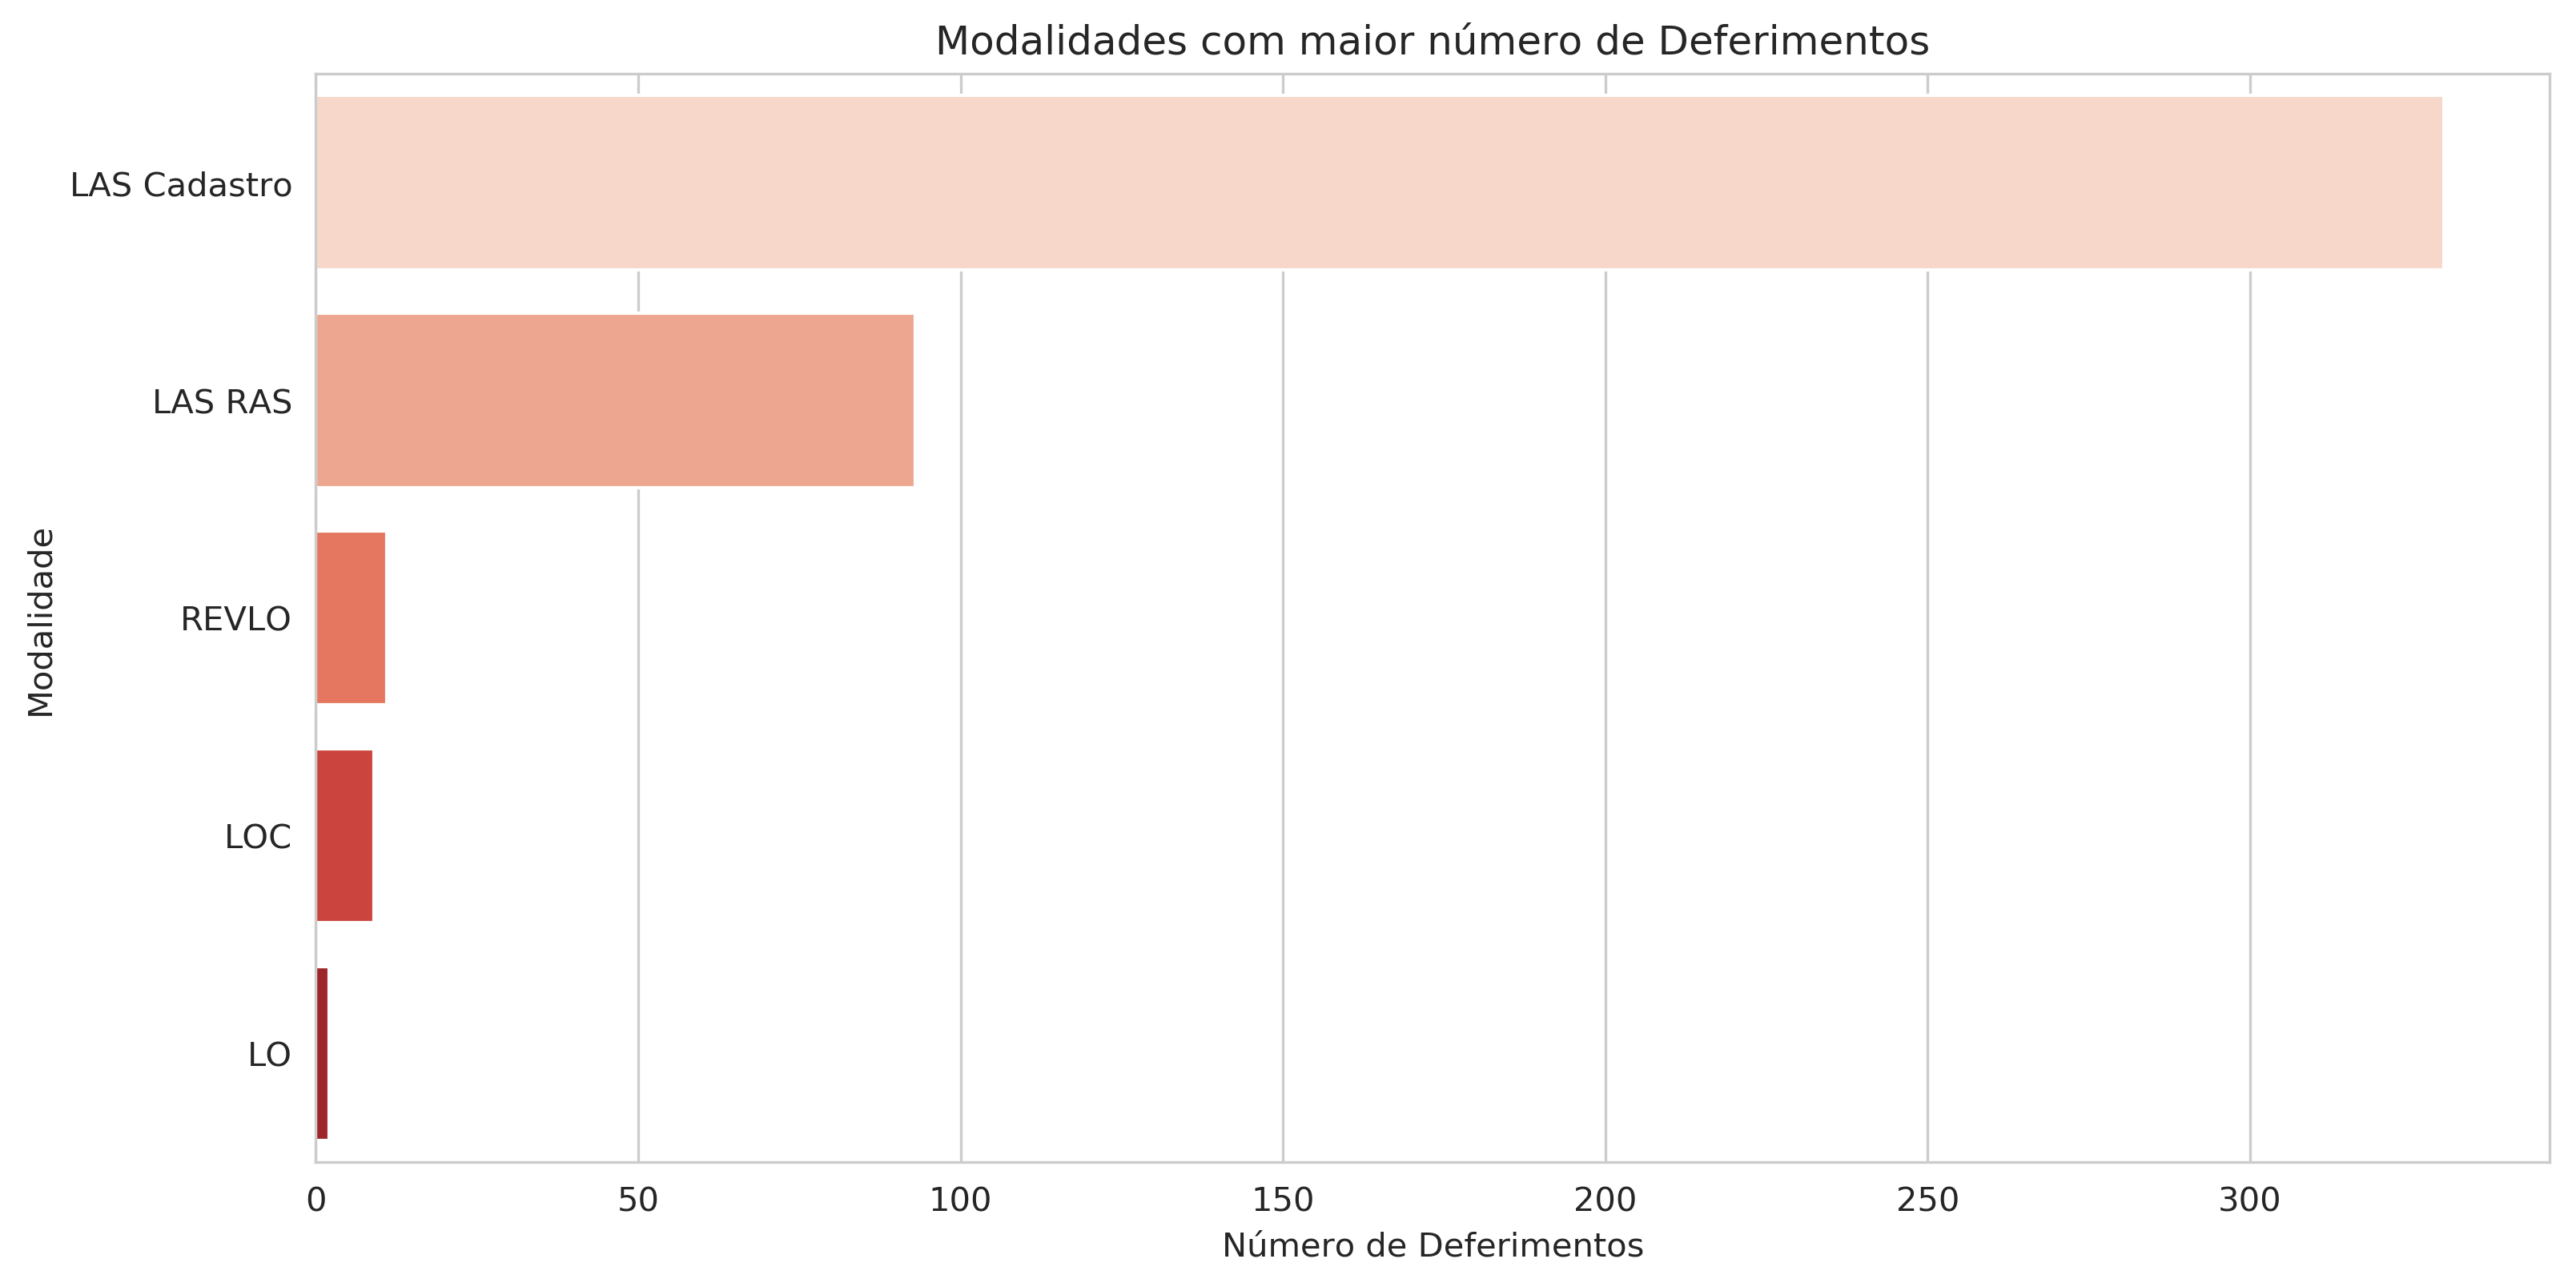

In [30]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 6), dpi=300)
ax = sns.countplot(
    y="Modalidade", 
    data=df[df['Decisao'] == 'Deferida'],  
    order=df['Modalidade'].value_counts().iloc[:5].index, 
    palette='Reds'
)

ax.set_title('Modalidades com maior número de Deferimentos')
ax.set_xlabel('Número de Deferimentos')
ax.set_ylabel('Modalidade')

In [28]:
df[df['Decisao'] == 'Deferida']

,Regional,Municipio,Empreendimento,Modalidade,Classe,Atividade,Data de Publicacao,Decisao,Codigo-Atividade
0,SUPRAM Sul de Minas,Itutinga,3W TRANSPORTES EIRELI,LAS Cadastro,1,F-02-01-1-Transporte rodoviário de produtos e ...,03/06/2019,Deferida,F-02-01-1
1,SUPRAM Sul de Minas,Luminárias,HERNANE JOSÉ FERREIRA ME,LAS Cadastro,2,"B-01-09-0-Aparelhamento, beneficiamento, prepa...",04/06/2019,Deferida,B-01-09-0
2,SUPRAM Sul de Minas,Bom Repouso,LATICÍNIOS JOANA LTDA.,LAS Cadastro,2,D-01-06-1-Fabricação de produtos de laticínios...,04/06/2019,Deferida,D-01-06-1
3,SUPRAM Sul de Minas,Pouso Alegre,UNILEVER BRASIL INDUSTRIAL LTDA.,LAS Cadastro,2,"F-06-01-7-Postos revendedores, postos ou ponto...",04/06/2019,Deferida,F-06-01-7
4,SUPRAM Sul de Minas,Itamonte,CLÁUDIO PENEDO SCARPA E OUTROS - GRANJA SANTA ...,LAS Cadastro,2,G-02-02-1-Avicultura,04/06/2019,Deferida,G-02-02-1
5,SUPRAM Sul de Minas,Nepomuceno,CERÂMICA OLIVEIRA & OLIVEIRA LTDA.,LAS Cadastro,1,B-01-03-1-Fabricação de cerâmica vermelha (tel...,04/06/2019,Deferida,B-01-03-1
6,SUPRAM Alto São Francisco,Capitólio,CAPITOLIO ALIMENTOS LTDA,LAS Cadastro,2,G-04-01-4-Beneficiamento primário de produtos ...,05/06/2019,Deferida,G-04-01-4
7,SUPRAM Alto São Francisco,Cláudio,METALURGICA AMAPA LTDA FILIAL,LAS Cadastro,2,B-05-04-5-Fabricação de estruturas metálicas e...,05/06/2019,Deferida,B-05-04-5
8,SUPRAM Alto São Francisco,Formiga,ARLAFOR INDUSTRIA E COMERCIO DE ARLA LTDA,LAS Cadastro,2,C-04-01-4-Produção de substâncias químicas e d...,05/06/2019,Deferida,C-04-01-4
9,SUPRAM Alto São Francisco,Morada Nova de Minas,APARECIDA GISLEY DA SILVA ARAUJO ME,LAS Cadastro,2,D-01-05-8-Processamento de subprodutos de orig...,05/06/2019,Deferida,D-01-05-8


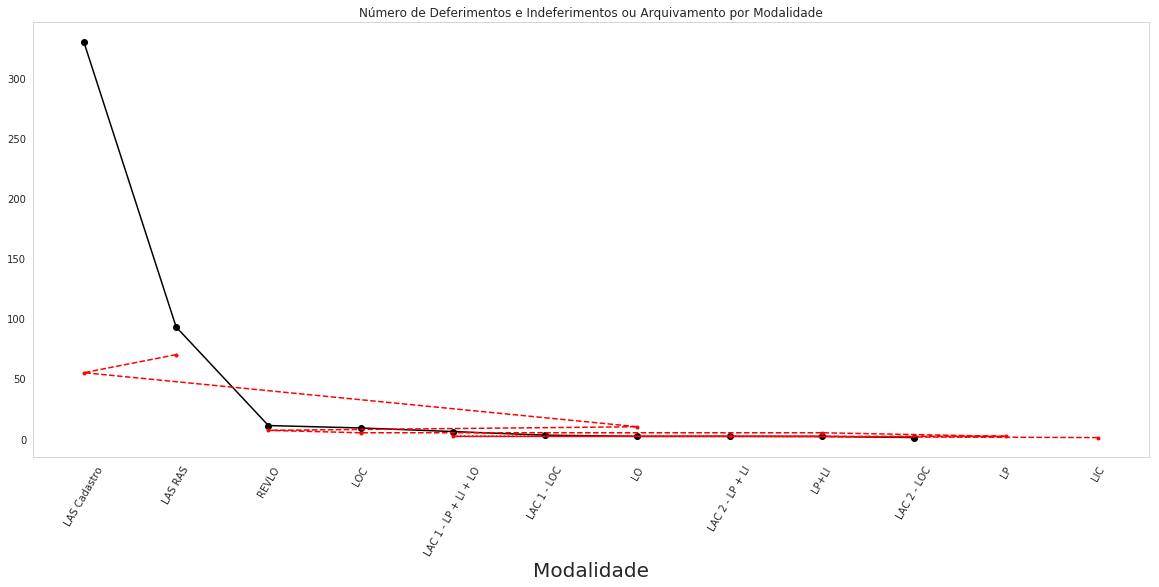

In [51]:
plt.figure(figsize=(20, 8))
plt.plot(df[df['Decisao'] == 'Deferida']['Modalidade'].value_counts()[:10], color='black', linestyle='-', marker='o')
plt.plot(df[df['Decisao'] != 'Deferida']['Modalidade'].value_counts()[:10], color='red', linestyle='--', marker='.')

plt.title('Número de Deferimentos e Indeferimentos ou Arquivamento por Modalidade')
plt.xlabel('Modalidade', fontdict={'size':20})
plt.ylabel('', fontdict={'size':20})
plt.xticks(rotation='60')
plt.grid(axis='y')
plt.grid(axis='x')

In [45]:
df[df['Decisao'] != 'Deferida']['Modalidade'].value_counts()[:10]

LAS RAS                 70
LAS Cadastro            55
LO                      10
REVLO                    7
LOC                      5
LP+LI                    5
LP                       2
LAC 1 - LP + LI + LO     2
LAC 2 - LP + LI          2
LIC                      1
Name: Modalidade, dtype: int64